In [1]:
import numpy as np
from regain.data.base import load_Petrobras
from regain.hmm.higher_order_hmm_graphical_lasso import HMM_GraphicalLasso
from regain.hmm.utils import corr_plot,plot_results_cluster,cov2corr,cluster_returns_recap
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
Petrob, BrazCurr,WTI = load_Petrobras()
print(Petrob, BrazCurr,WTI)

           Ultimo Apertura Massimo Minimo    Vol.   Var. %
Data                                                      
20.03.2020  12,22    13,15   13,47  11,85  38,67M   -1,85%
19.03.2020  12,45    11,00   13,05  10,50  68,11M   12,67%
18.03.2020  11,05    11,70   12,20  10,50  73,47M  -15,52%
17.03.2020  13,08    13,66   14,11  13,00  53,01M   -0,38%
16.03.2020  13,13    13,99   14,67  13,10  39,54M  -17,21%
...           ...      ...     ...    ...     ...      ...
28.02.2007  19,57    19,71   19,83  19,30   5,30M   -0,31%
27.02.2007  19,63    19,69   20,10  19,42   4,73M   -4,43%
26.02.2007  20,54    20,54   20,71  20,51   1,75M    0,44%
23.02.2007  20,45    20,43   20,69  20,41   2,88M    0,44%
22.02.2007  20,36    20,20   20,40  20,08   3,31M    1,39%

[3233 rows x 6 columns]             Ultimo Apertura Massimo  Minimo  Var. %
Data                                               
20.03.2020  5,0640   5,0010  5,0662  4,9820  -0,63%
19.03.2020  5,0960   5,1098  5,2140  5,0682  -0,23%


In [9]:
ind_WTI = np.zeros(np.size(WTI.index),bool)

for i,date in enumerate(WTI.index):
    ind_WTI[i] = np.any(Petrob.index==date)
print(np.sum(ind_WTI))

New_Dates = WTI.index[ind_WTI]



ind_braz = np.zeros(np.size(BrazCurr.index),bool)

for i,date in enumerate(BrazCurr.index):
    ind_braz[i] = np.any(New_Dates==date)
print(np.sum(ind_braz))
 
ind_Petr = np.zeros(np.size(Petrob.index),bool)

for i,date in enumerate(Petrob.index):
    ind_Petr[i] = np.any(New_Dates==date)
print(np.sum(ind_Petr))



3198
3198
3198


In [10]:
BrazCurr_filt = BrazCurr['Ultimo'].values[ind_braz]
WTI_filt = WTI['Ultimo'].values[ind_WTI]
Petrob_filt = Petrob['Ultimo'].values[ind_Petr]
data = np.zeros((np.size(BrazCurr_filt),3))

for i in range(np.size(BrazCurr_filt)):
    data[i,0] = float(BrazCurr_filt[i].replace(',','.'))
    data[i,1] = float(Petrob_filt[i].replace(',','.'))
    data[i,2] = float(WTI_filt[i].replace(',','.'))


In [11]:
# Compute returns
returns_mat = np.zeros((np.size(data,axis = 0)-1,np.size(data,axis = 1)))

for i in range(1,np.size(data,axis = 0)):
    returns_mat[i-1,:] = (data[i,:]-data[i-1,:])/data[i-1,:]*100

In [12]:
print(returns_mat)

[[  0.63191153   1.88216039  12.43869817]
 [  0.22566719 -11.24497992 -19.23076923]
 [ -1.90895742  18.37104072  32.3024055 ]
 ...
 [ -2.41629595   4.63576159  -0.11389522]
 [  0.26872691  -0.43816943  -0.40723245]
 [ -0.35893754  -0.4400978   -0.31076219]]


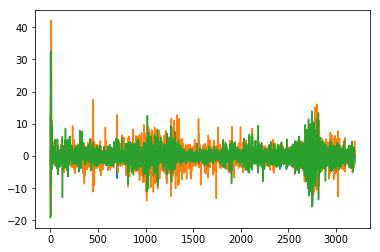

In [13]:
plt.plot(returns_mat)

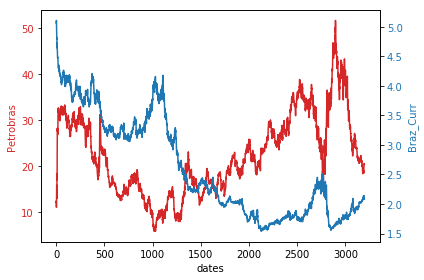

In [14]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('dates')
ax1.set_ylabel('Petrobras', color=color)
ax1.plot( data[:,1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Braz_Curr', color=color)  # we already handled the x-label with ax1
ax2.plot( data[:,0], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

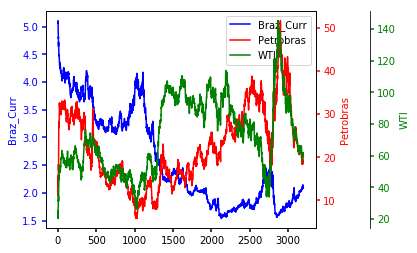

In [29]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(data[:,0], "b-", label="Braz_Curr")
p2, = par1.plot(data[:,1], "r-", label="Petrobras")
p3, = par2.plot(data[:,2], "g-", label="WTI")


host.set_ylabel("Braz_Curr")
par1.set_ylabel("Petrobras")
par2.set_ylabel("WTI")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [30]:
lam = 0
max_iter = 300
N_states = 4

mdl = HMM_GraphicalLasso(alpha=lam,
                         n_clusters=N_states,
                         verbose=False,
                         max_iter=max_iter,
                         mode='scaled',
                         warm_restart=True,
                         repetitions=50,
                         n_jobs=-1)
mdl.fit(returns_mat)

HMM_GraphicalLasso(alpha=0, init_params={}, max_iter=300, mode='scaled',
                   n_clusters=4, n_jobs=-1, repetitions=50, tol=0.0001,
                   verbose=False, warm_restart=True)

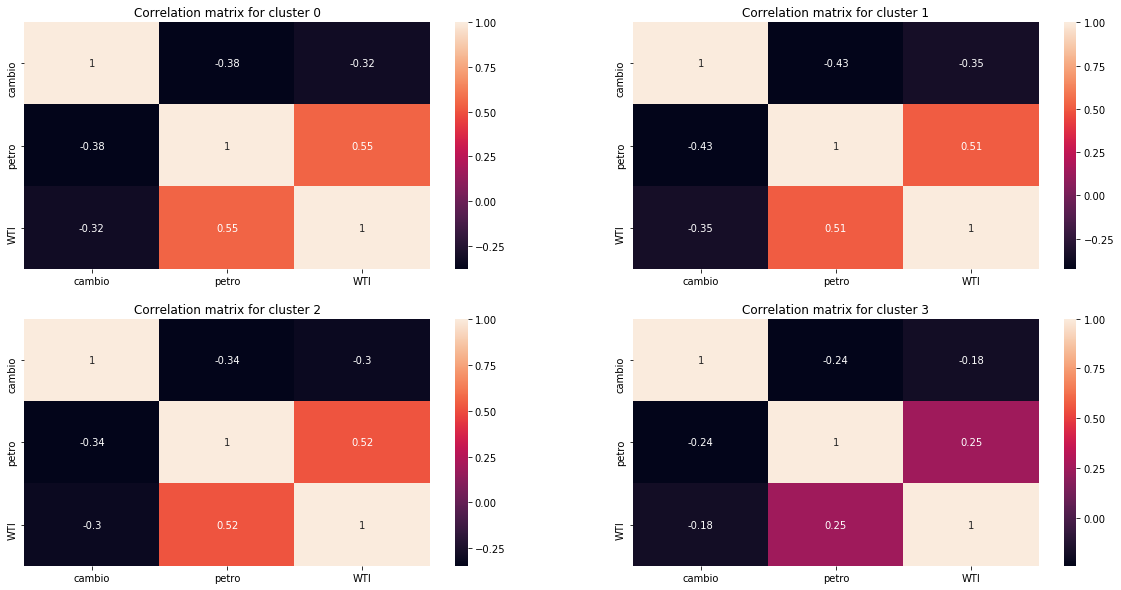

In [34]:
corr_plot(mdl.covariances_,labels=["cambio","petro","WTI"],covcorr = True)

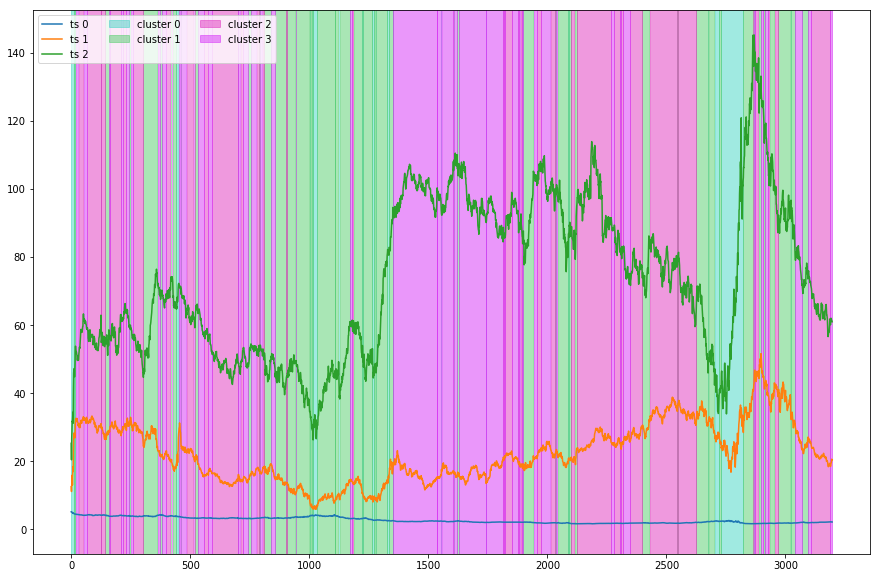

In [33]:
plot_results_cluster(data, mdl.labels_)

In [ ]:
from regain.hmm.utils_portfolio_optimization import PO_with_HMM_GMM
N_backtest = 1000
Invest_wealth = 1e5


PLpred,PLtod,PLemp = PO_with_HMM_GMM(returns_mat,
                                     data[1:,:],
                                     np.linspace(0,50,3),
                                     [2,3],
                                     N_max_mem = 1500,
                                     N_test=N_backtest,
                                     Wealth=Invest_wealth,
                                     mu_p= 0.1,
                                     OP_method = 'Min_Var_Fix_return')



  0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [03:11<03:11, 191.68s/it]


100%|██████████| 2/2 [09:41<00:00, 290.97s/it]


 33%|███▎      | 1/3 [09:41<19:23, 581.94s/it]


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [03:08<03:08, 188.93s/it]


100%|██████████| 2/2 [09:48<00:00, 294.15s/it]


 67%|██████▋   | 2/3 [19:30<09:43, 583.85s/it]


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [03:08<03:08, 188.71s/it]


100%|██████████| 2/2 [09:46<00:00, 293.19s/it]


100%|██████████| 3/3 [29:16<00:00, 585.54s/it]


[-0.01432894  0.02738042  0.00291998]
Price difference 0.009800000000000031 N purchased pred 18795 N purchased today -141490 N purchased emp 40992
Price difference 0.5499999999999972 N purchased pred 588 N purchased today 9086 N purchased emp 985
Price difference -0.8599999999999994 N purchased pred 511 N purchased today 801 N purchased emp 84
P&L predict [68.131]
P&L today [2921.838]
P&L emp [871.2316]
[-0.01331441  0.03331464  0.00161486]
Price difference -0.013100000000000112 N purchased pred -97833 N purchased today -97833 N purchased emp 43838
Price difference 0.990000000000002 N purchased pred 8833 N purchased today 8833 N purchased emp 820
Price difference 3.6700000000000017 N purchased pred 181 N purchased today 181 N purchased emp 75
P&L predict [   68.131  10758.6833]
P&L today [ 2921.838  13612.3903]
P&L emp [ 871.2316 1384.0038]
[-0.01387717  0.03830037  0.00886806]
Price difference -0.014000000000000012 N purchased pred -103800 N purchased today -103800 N purchased emp 448



  0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

[-0.01063202  0.04991023  0.00720104]
Price difference -0.0035999999999998256 N purchased pred -53652 N purchased today -53652 N purchased emp 49316
Price difference -0.17999999999999972 N purchased pred 6182 N purchased today 6182 N purchased emp 201
Price difference -2.450000000000003 N purchased pred 64 N purchased today 64 N purchased emp 127
P&L predict [   68.131  10758.6833 16969.4233 13909.7942 13928.8798 15903.0164
 18949.0894 20537.7723 17364.3398 16287.927 ]
P&L today [ 2921.838  13612.3903 19823.1303 16763.5012 15483.3093 17457.4459
 20503.5189 20653.9791 17480.5466 16404.1338]
P&L emp [ 871.2316 1384.0038 1264.1958 1983.951  3447.1885 3134.2418 3263.7598
 4284.748  4264.267  3739.3994]





 50%|█████     | 1/2 [03:27<03:27, 207.42s/it]


100%|██████████| 2/2 [10:06<00:00, 303.41s/it]


 33%|███▎      | 1/3 [10:06<20:13, 606.81s/it]


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [03:21<03:21, 201.03s/it]


100%|██████████| 2/2 [10:07<00:00, 303.83s/it]


 67%|██████▋   | 2/3 [20:14<10:07, 607.07s/it]


  0%|          | 0/2 [00:00<?, ?it/s]


 50%|█████     | 1/2 [03:17<03:17, 197.06s/it]


100%|██████████| 2/2 [10:05<00:00, 302.97s/it]


100%|██████████| 3/3 [30:20<00:00, 606.80s/it]


[-0.0119934   0.04886523  0.00590813]
Price difference 0.017599999999999838 N purchased pred -54358 N purchased today -54358 N purchased emp 49096
Price difference 0.0 N purchased pred 6270 N purchased today 6270 N purchased emp 236
Price difference 0.5200000000000102 N purchased pred 61 N purchased today 61 N purchased emp 126
P&L predict [   68.131  10758.6833 16969.4233 13909.7942 13928.8798 15903.0164
 18949.0894 20537.7723 17364.3398 16287.927  15362.9462]
P&L today [ 2921.838  13612.3903 19823.1303 16763.5012 15483.3093 17457.4459
 20503.5189 20653.9791 17480.5466 16404.1338 15479.153 ]
P&L emp [ 871.2316 1384.0038 1264.1958 1983.951  3447.1885 3134.2418 3263.7598
 4284.748  4264.267  3739.3994 4669.009 ]
[-0.01146495  0.05218517  0.00978469]
Price difference 0.016900000000000137 N purchased pred -56141 N purchased today -56141 N purchased emp 47991
Price difference 0.0799999999999983 N purchased pred 5730 N purchased today 5730 N purchased emp 259
Price difference -0.81000000000



  0%|          | 0/3 [00:00<?, ?it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

[-0.00806808  0.05272121 -0.00320363]
Price difference -0.0024999999999999467 N purchased pred -4567 N purchased today -4567 N purchased emp 48786
Price difference -0.36999999999999744 N purchased pred 6402 N purchased today 6402 N purchased emp -11
Price difference -3.4399999999999977 N purchased pred -751 N purchased today -751 N purchased emp 181
P&L predict [   68.131  10758.6833 16969.4233 13909.7942 13928.8798 15903.0164
 18949.0894 20537.7723 17364.3398 16287.927  15362.9462 14672.4933
 17347.3989 16106.8971 17246.5131 15476.5219 12864.4895 12042.7789
 13076.2264 13302.3439]
P&L today [ 2921.838  13612.3903 19823.1303 16763.5012 15483.3093 17457.4459
 20503.5189 20653.9791 17480.5466 16404.1338 15479.153  14788.7001
 17463.6057 16223.1039 17362.7199 15592.7287 12980.6963 12158.9857
 13192.4332 13418.5507]
P&L emp [ 871.2316 1384.0038 1264.1958 1983.951  3447.1885 3134.2418 3263.7598
 4284.748  4264.267  3739.3994 4669.009  5397.0969 5579.9793 5511.2841
 5611.2795 5264.4947 5377.




 50%|█████     | 1/2 [03:28<03:28, 208.97s/it]